In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
from skimage import color

## In this notebook, I have done some simple image processing tasks on this [dataset](https://www.kaggle.com/gooogr/yolo-medical-mask-dataset), using scikit-image Library

In [3]:
images_file = glob.glob('mask_dataset\*.jpg')

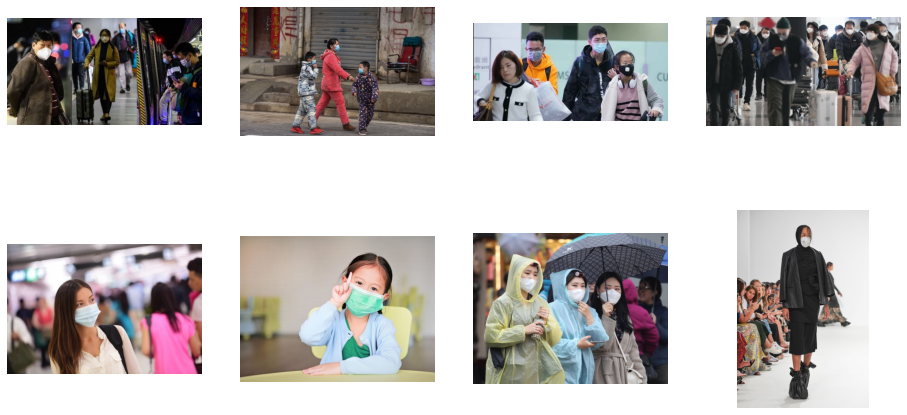

In [4]:
#visualizing a random number of images
nrows, ncols = 2, 4
files = np.random.choice(images_file, 8)
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 8))
for i, ax in enumerate(axes.flatten()):
    img = plt.imread(files[i])
    ax.imshow(img)
    ax.axis('off')
    

In [5]:
# choosing a random image to perform some analysis
file = np.random.choice(images_file)
img = plt.imread(file)

(-0.5, 851.5, 430.5, -0.5)

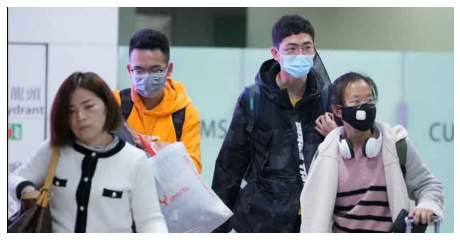

In [6]:
plt.figure(figsize=(8, 8))
_=plt.imshow(img)
plt.axis('off')

Text(0, 0.5, 'Number of Pixels')

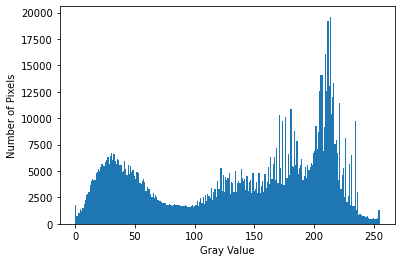

In [7]:
_=plt.hist(img.ravel(), bins=256)
plt.xlabel('Gray Value')
plt.ylabel('Number of Pixels')

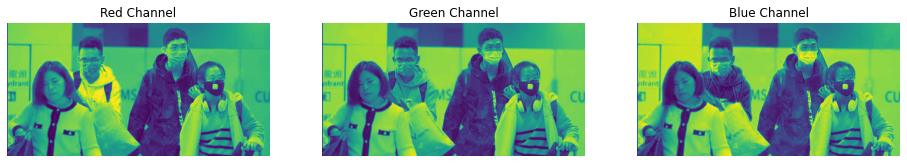

In [8]:
# decomposing the image into 3 channels
fig, axes = plt.subplots(1, 3, figsize=(16, 16))
colors = ['Red', 'Green', 'Blue']
for i, (color,ax) in enumerate(zip(colors, axes.flatten())):
    ax.imshow(img[:, :, i])
    ax.axis('off')
    ax.set_title(color + ' Channel')

## Thresholding

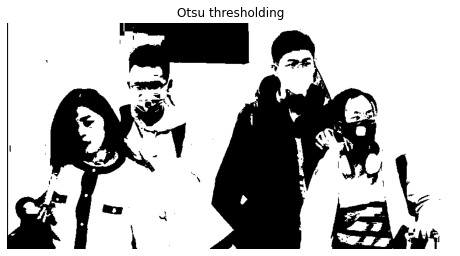

In [98]:
# Global thresholding, suitable for uniform background image
from skimage import color
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
img_gray = color.rgb2gray(img)
#fig, ax = try_all_threshold(img_gray, verbose=False, figsize=(12, 12))

# Thresholding using Otsu thresholding method
thresh_otsu = threshold_otsu(img_gray)
img_gray_binary = img_gray > thresh_otsu
plt.figure(figsize=(8, 8))
plt.imshow(img_gray_binary, cmap = 'gray')
plt.title('Otsu thresholding')
_=plt.axis('off')

Text(0.5, 1.0, 'Local thresholding')

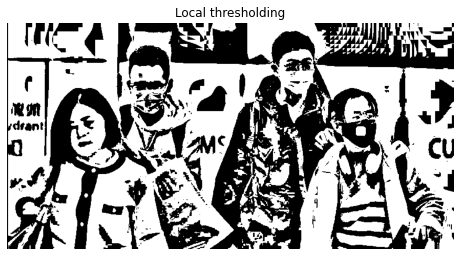

In [99]:
# Local thresholding, for non-uniform background image

from skimage.filters import threshold_local

block_size = 75
local_thresh = threshold_local(img_gray, block_size)
img_binary_local = img_gray > local_thresh
plt.figure(figsize=(8, 8))
plt.imshow(img_binary_local, cmap='gray')
_=plt.axis('off')
plt.title('Local thresholding')

## Edge filter

Text(0.5, 1.0, 'Edge filter')

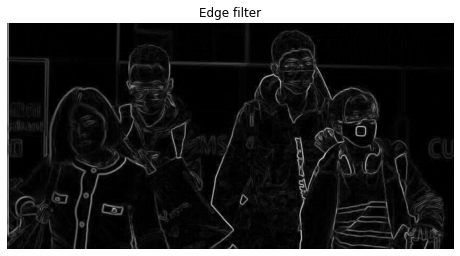

In [100]:
# Edge detection using sobel filter
from skimage.filters import sobel

sobel_image = sobel(img_gray)
plt.figure(figsize=(8, 8))
plt.imshow(sobel_image, cmap='gray')
_=plt.axis('off')
plt.title('Edge filter')

## Gaussian filter

Text(0.5, 1.0, 'Gaussian filter')

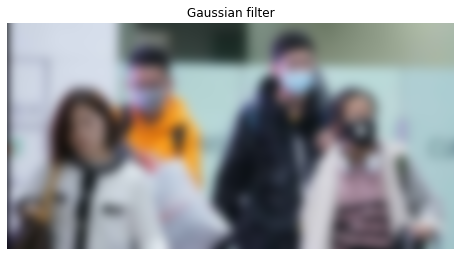

In [101]:
# Image blurring, using gaussian filter
from skimage.filters import gaussian

img_gauss = gaussian(img, multichannel = True, sigma = 10)
plt.figure(figsize=(8, 8))
plt.imshow(img_gauss)
_=plt.axis('off')
plt.title('Gaussian filter')

## Contrast Enhancement

(-0.5, 851.5, 430.5, -0.5)

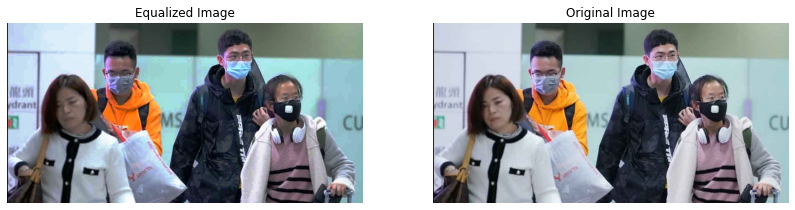

In [97]:
equalized_img = exposure.equalize_hist(img)

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(equalized_img)
ax1.set_title('Equalized Image')
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img)
ax2.set_title('Original Image')
ax2.axis('off')

Text(0.5, 1.0, 'Equalized')

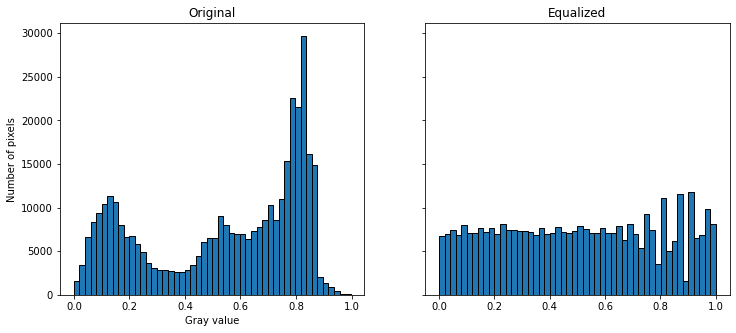

In [15]:
# Effect of equalization on the histogram of the gray-scale image
from skimage import exposure
equalized_img = exposure.equalize_hist(img_)
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
_=ax[0].hist(img_gray.ravel(), bins=50, edgecolor='k')
ax[0].set_title('Original')
ax[0].set_xlabel('Gray value')
ax[0].set_ylabel('Number of pixels')
_=ax[1].hist(equalized_img.ravel(), bins=50, edgecolor='k')
ax[1].set_title('Equalized')

# Simple Linear Iterative Clustering (SLIC)

In [16]:
from skimage.segmentation import slic
from skimage.color import label2rgb

C:\Users\amir\Anaconda3\envs\tf2p3.6\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """


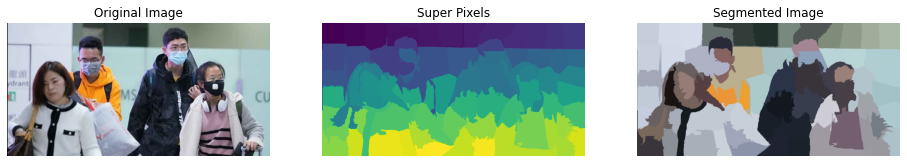

In [33]:
# turning the image into a specified number of super pixels

n_segments = 100
segments = slic(img, n_segments = n_segments, start_label = 1)
segmented_img = label2rgb(segments, img, kind='avg')
lst = [img, segments, segmented_img]
names = ['Original Image', 'Super Pixels', 'Segmented Image']
fig, axes = plt.subplots(1, 3, figsize = (16, 8))
for i, ax in enumerate(axes):
    ax.imshow(lst[i])
    ax.set_title(names[i])
    ax.axis('off')

## Face detection using skimage

In [86]:
from skimage import data
from skimage.feature import Cascade

trained = data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained)
# Coordinates of the detected faces
faces = detector.detect_multi_scale(img = img,
                                   scale_factor = 1.2,
                                   step_ratio = 1,
                                   min_size = (20, 20),
                                   max_size = (200, 200))

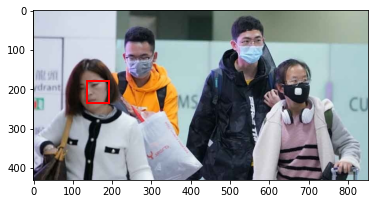

In [87]:
plt.imshow(img)
ax = plt.gca()
for face in faces:
    rect = plt.Rectangle((face['c'], face['r']), face['height'], face['width'], fill=False, color='red', linewidth=2)
    ax.add_patch(rect)

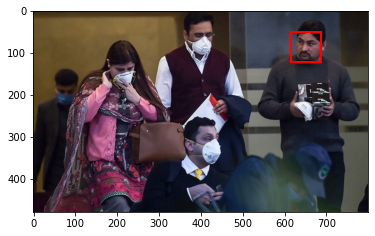

In [90]:
# another example
file2 = np.random.choice(images_file)
img2 = plt.imread(file2)

trained = data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained)

faces = detector.detect_multi_scale(img = img2,
                                   scale_factor = 1.2,
                                   step_ratio = 1,
                                   min_size = (15, 15),
                                   max_size = (200, 200))

plt.imshow(img2)
ax = plt.gca()
for face in faces:
    rect = plt.Rectangle((face['c'], face['r']), face['height'], face['width'], fill=False, color='red', linewidth=2)
    ax.add_patch(rect)